<a href="https://colab.research.google.com/github/ZaishG/Kaggle_House_Prices/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sale price of House using ML
In this Notebook, we're going to go through an example ML project with the goal of predicting the sale price of Houses with around 80 explanatory variables describing (almost) every aspect of residential homes, this competition challenges you to predict the final price of each home.
1. Problem Definition:
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable

  `How well will my ML model predict House Price, given its characteristics and sample data.`
2. Data:
Data is downloaded from: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
  
  There are given 2 main datasets:

  a) Train.csv is training set, containing 1460 data rows.

   b) Test.csv is test set, containing 1460 data rows.
3. Evaluation:¶
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

4. Features:
Kaggle provides a data dictionary detailing all of the features of the dataset.

  Dataset: data_description.txt

In [145]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sets maximum rows to display to False so that all rows and columns will be displayed
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns",None)

In [146]:
df = pd.read_csv("sample_data/train.csv",
                 index_col='Id',
                 low_memory=False)

# Redaing actual test file also
df_test = pd.read_csv("sample_data/test.csv",
                      index_col='Id',
                      low_memory=False)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [149]:
df.shape, df_test.shape

((1460, 80), (1459, 79))

In [150]:
df.size

116800

Text(0.5, 0, 'Sale Type')

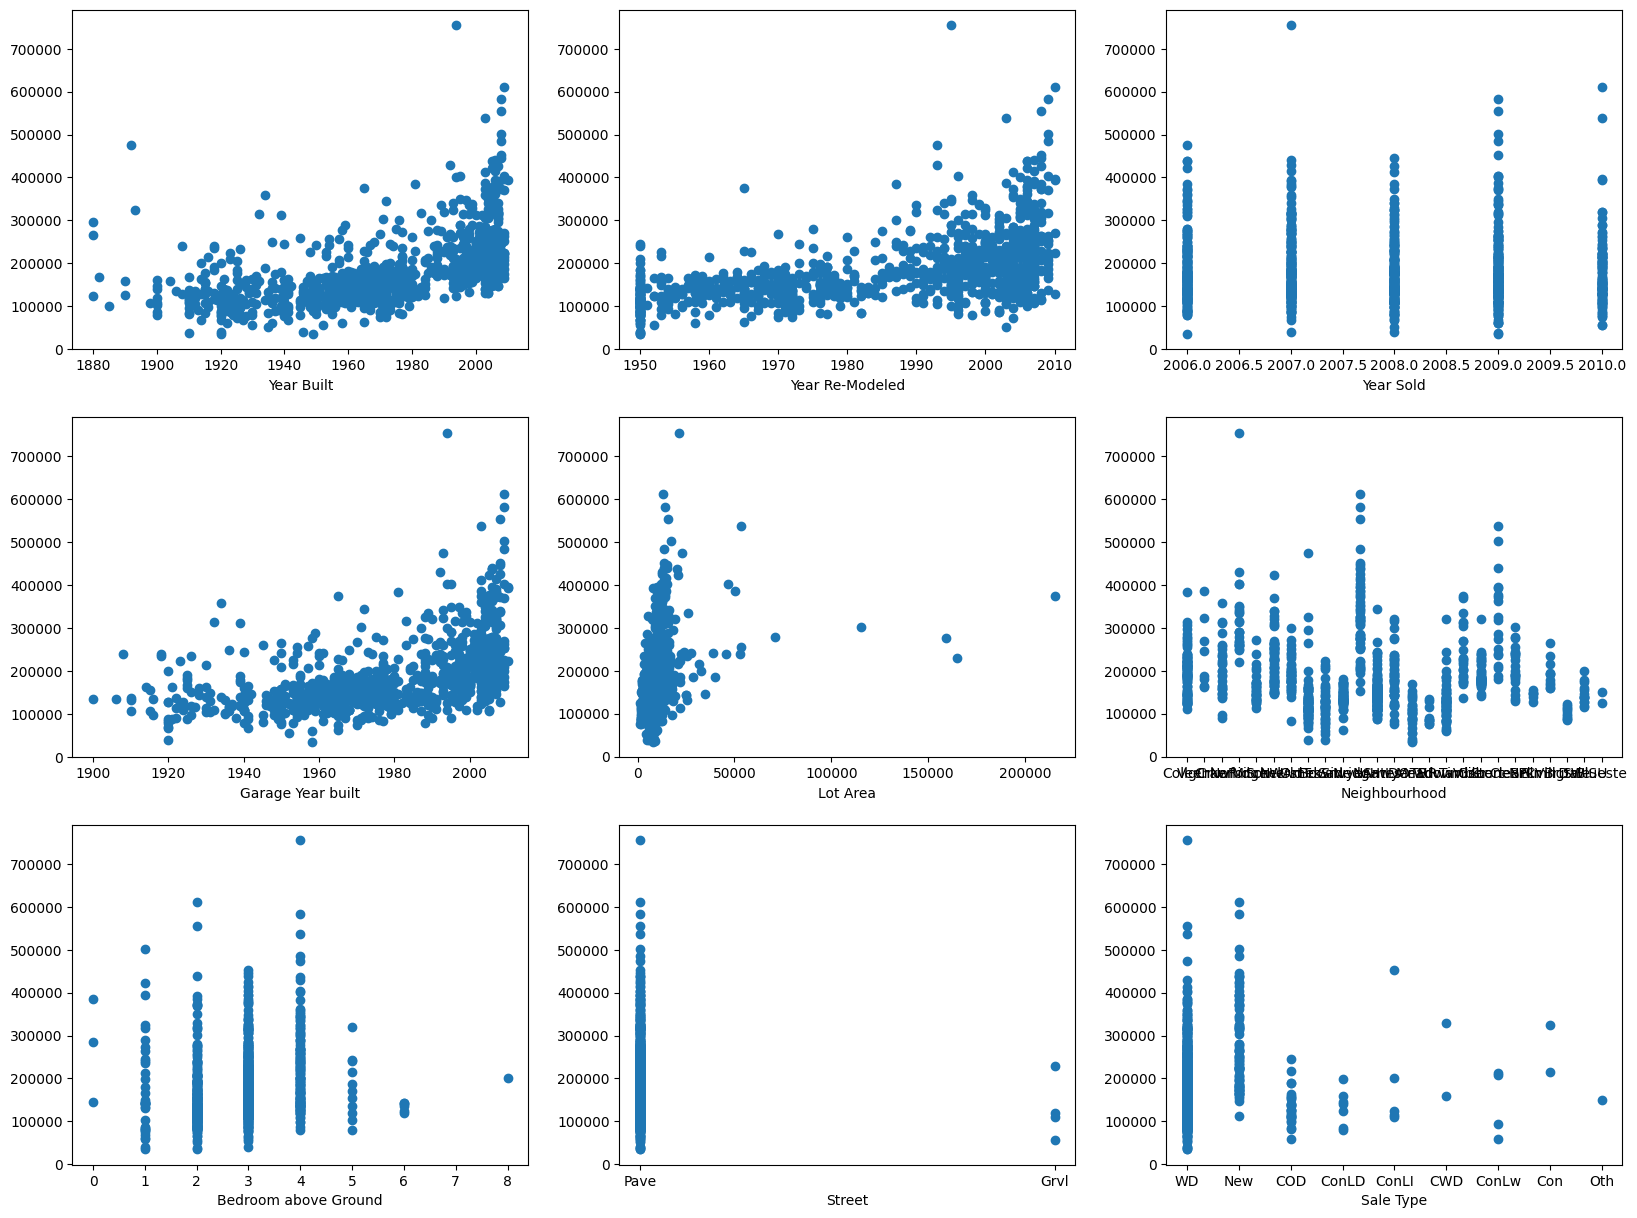

In [151]:
fig, ((ax1, ax2, ax3),  (ax4, ax5, ax6),  (ax7, ax8, ax9)) =plt.subplots(nrows=3,
                                                                      ncols=3,
                                                                  figsize=(20,15))

ax1.scatter(df["YearBuilt"][:1000], df["SalePrice"][:1000])
ax2.scatter(df["YearRemodAdd"][:1000], df["SalePrice"][:1000])
ax3.scatter(df["YrSold"][:1000], df["SalePrice"][:1000])
ax4.scatter(df["GarageYrBlt"][:1000], df["SalePrice"][:1000])
ax5.scatter(df["LotArea"][:1000], df["SalePrice"][:1000])
ax6.scatter(df["Neighborhood"][:1000], df["SalePrice"][:1000])
ax7.scatter(df["BedroomAbvGr"][:1000], df["SalePrice"][:1000])
ax8.scatter(df["Street"][:1000], df["SalePrice"][:1000])
ax9.scatter(df["SaleType"][:1000], df["SalePrice"][:1000])
ax1.set_xlabel("Year Built")
ax2.set_xlabel("Year Re-Modeled")
ax3.set_xlabel("Year Sold")
ax4.set_xlabel("Garage Year built")
ax5.set_xlabel("Lot Area")
ax6.set_xlabel("Neighbourhood")
ax7.set_xlabel("Bedroom above Ground")
ax8.set_xlabel("Street")
ax9.set_xlabel("Sale Type")

**Note**: There is one SalesPrice outlier above 700000, should be removed

In [152]:
# Removing SalesPrice Outlier
df.drop(df.SalePrice.idxmax(), inplace=True)
df.SalePrice.max()

745000

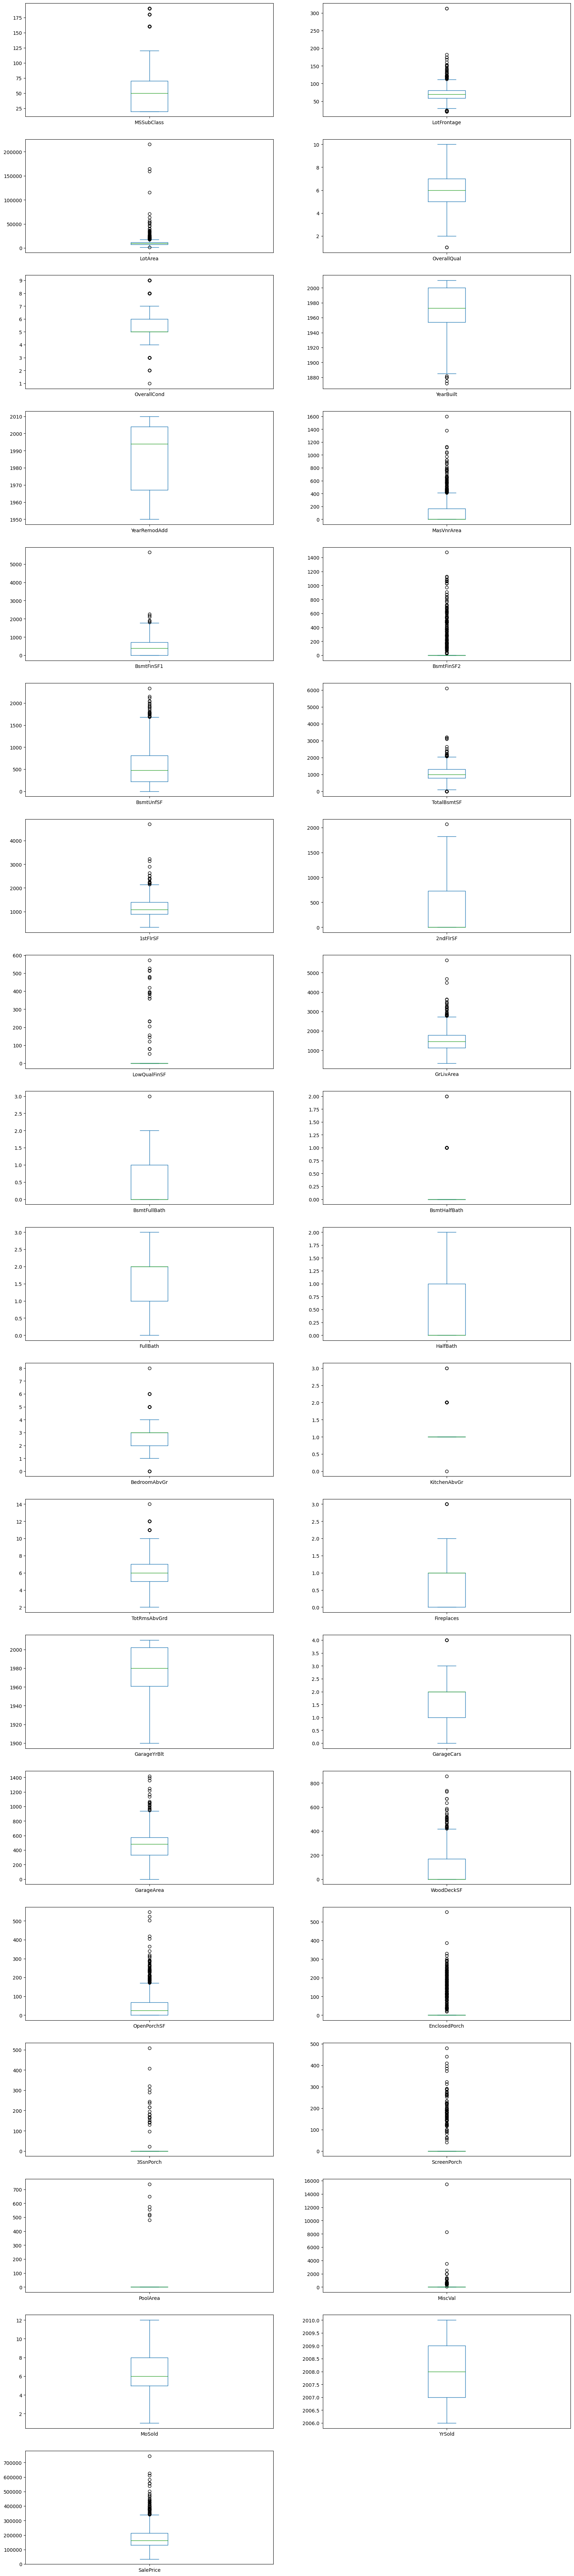

In [153]:
def box_plot(dft):
    df.plot(kind="box", subplots=True, layout=(40,2), figsize=(20,200))
box_plot(df)

In [154]:
# Function to seperate int or float labels from object ones

def dfType(df, include = "else"):
    dftype = []
    for label, content in df.items():
      if include == "int_float":
        if (pd.api.types.is_int64_dtype(content) or pd.api.types.is_float_dtype(content)):
          dftype.append(label)
          # print(label, '    ', df[label].dtype)
      elif include == "object":
        if pd.api.types.is_object_dtype(content):
          dftype.append(label)
          # print(label, '    ', df[label].dtype)
      else:
        if pd.api.types.is_categorical_dtype(content):
          dftype.append(label)
          # print(label, '    ', df[label].dtype)
    return dftype

obj_cols = dfType(df, "object")
int_float_cols = dfType(df, "int_float")
cat_cols = dfType(df)

# obj_cols = list(df.dtypes[df.dtypes=='object'].index)
# int_cols = list(df.dtypes[df.dtypes=='int'].index)
# float_cols = list(df.dtypes[df.dtypes=='float'].index)
print('Object col:', obj_cols)
print("Float-int cols:", int_float_cols)
print("Category cols:", cat_cols)

Object col: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Float-int cols: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDec

In [155]:
# Test file
obj_cols_test = dfType(df_test, "object")
int_float_cols_test = dfType(df_test, "int_float")
cat_cols_test = dfType(df_test)
print('Object col:', obj_cols_test)
print("Float-int cols:", int_float_cols_test)
print("Category cols:", cat_cols_test)

Object col: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Float-int cols: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDec

**Sort DataFrame by saledate**
As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

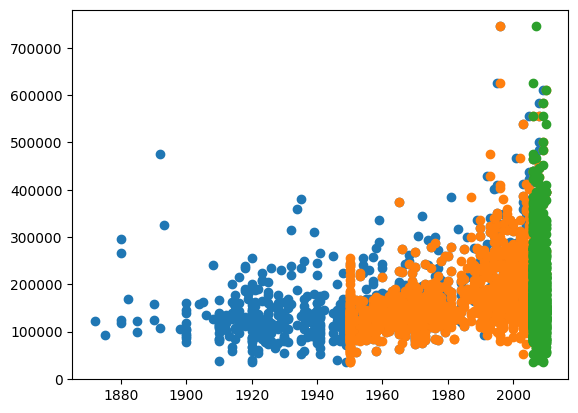

In [156]:
fig, ax = plt.subplots()
ax.scatter(df["YearBuilt"], df["SalePrice"])
ax.scatter(df["YearRemodAdd"], df["SalePrice"])
ax.scatter(df["YrSold"], df["SalePrice"])


**Note:** Both Year Built and Year ReModAdd dates has same effect. We can sort data using Year Built. However Year Sold does not give much info as most of houses are sold after 2000.

# 5. Modelling
We've explored our dataset a little, now let's try to model.


Following the Scikit-Learn machine learning map, we find a RandomForestRegressor() might be a good candidate.

## 5.1 Working on data
Our data has missing values, categorical data mentioned as objects, extra columns(eg. ID) or combined columns(eg. Dates)


In [157]:
# Displaying data description file
with open('sample_data/data_description.txt') as data_desc:
  data_dict = data_desc.read()
  print(data_dict)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Fill missing values

In [158]:
#which features has Nan
df.isna().sum()
# df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1368
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

**Note:** Alley, PoolQC, Fence and MiscFeatures have lot of Nulls and fewer data points.

In [159]:
df_test.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<Axes: title={'center': 'Heat map'}, ylabel='Id'>

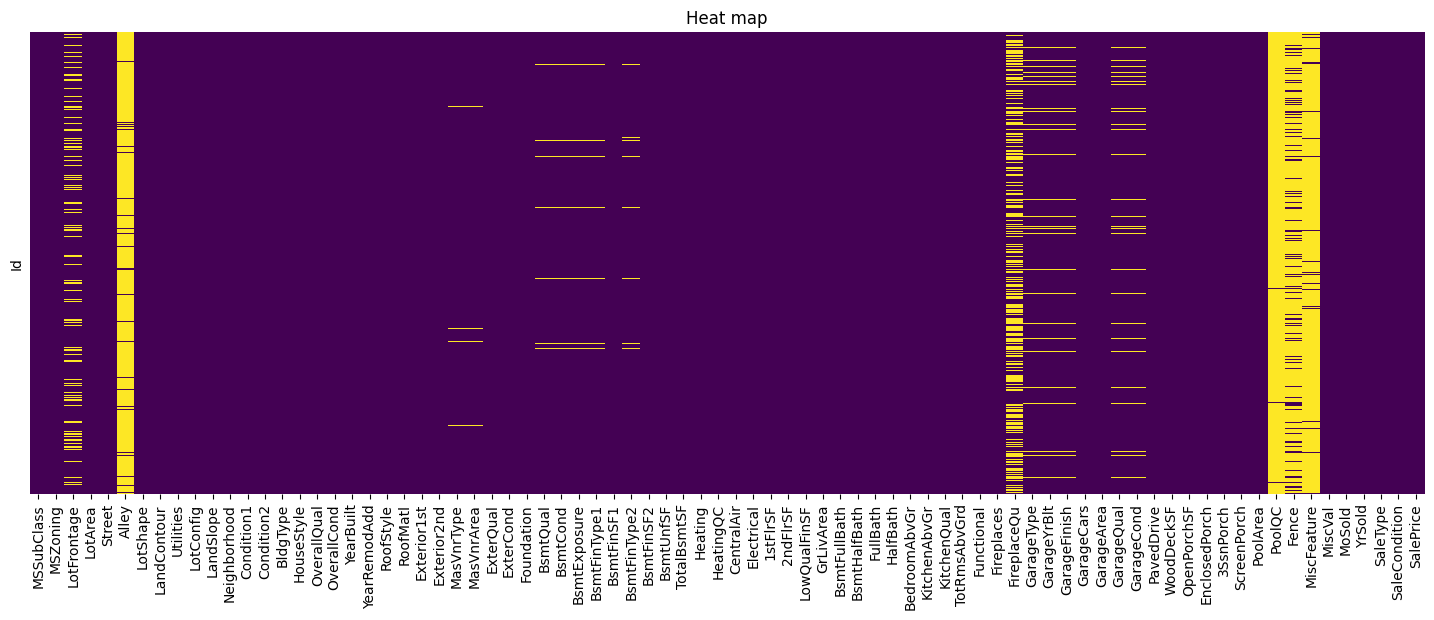

In [160]:
# Training data
# Show heatmap to hightlight which columns have highest missing values
plt.figure(figsize=(18,6))
plt.title('Heat map')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

**Note:** Yellow part describe Nan or missing values and rest of color is data points.

<Axes: title={'center': 'Heat map'}, ylabel='Id'>

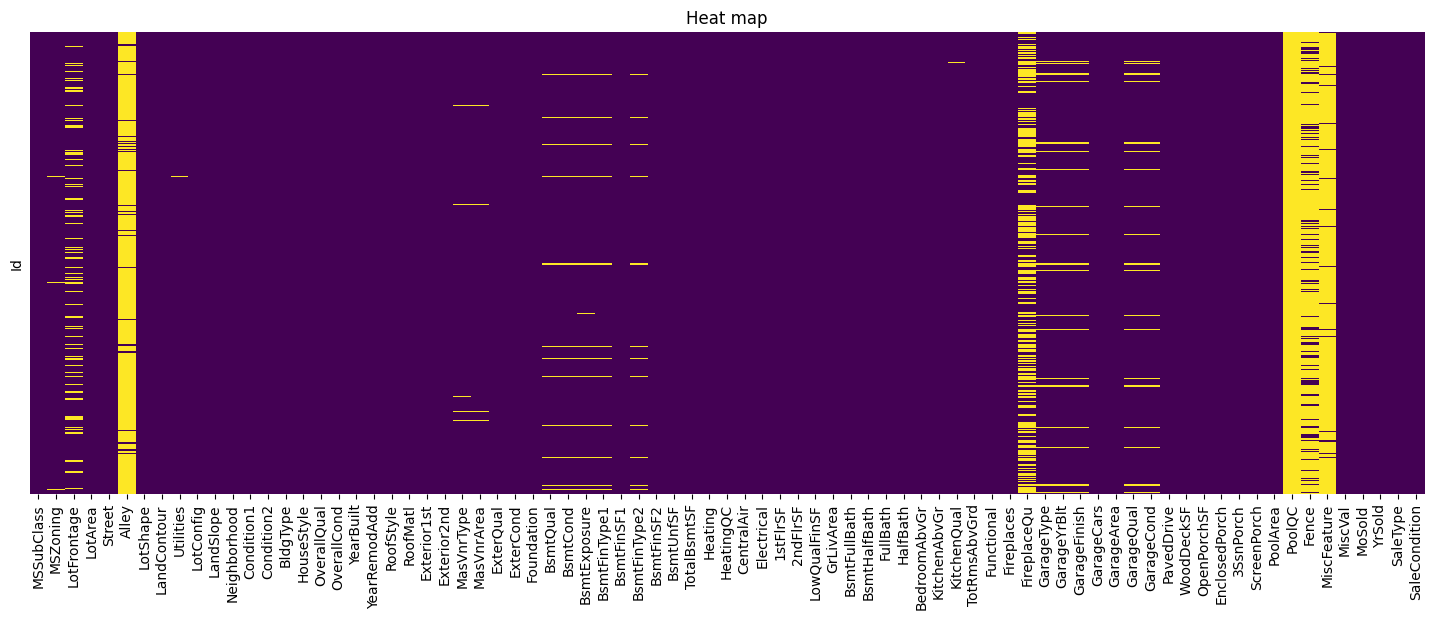

In [161]:
# Test Data
# Show heatmap to hightlight which columns have highest missing values
plt.figure(figsize=(18,6))
plt.title('Heat map')
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

### Unique Category Feature distibution

In [162]:
obj_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Note:** Categories ['MSSubClass', 'OverallQual', 'OverallCond'] are not included above, as they are of int type. So for this will add them in.

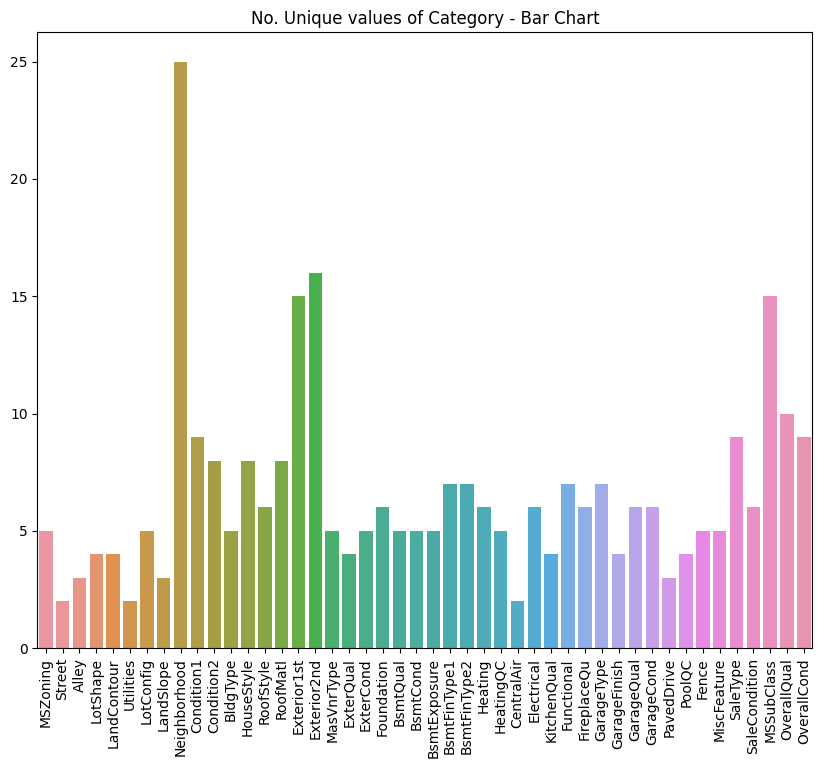

In [163]:
# No. of Unique values of object features displayed on bar chart.
obj_values = []
obj_cols_to_add = ['MSSubClass', 'OverallQual', 'OverallCond']
obj_cols_added = obj_cols + obj_cols_to_add
for col in obj_cols_added:
  obj_values.append(df[col].unique().size)
plt.figure(figsize=(10,8))
plt.title("No. Unique values of Category - Bar Chart")
plt.xticks(rotation=90)
sns.barplot(x=obj_cols_added, y=obj_values)

# Same for test data
obj_cols_added_test = obj_cols_test + obj_cols_to_add


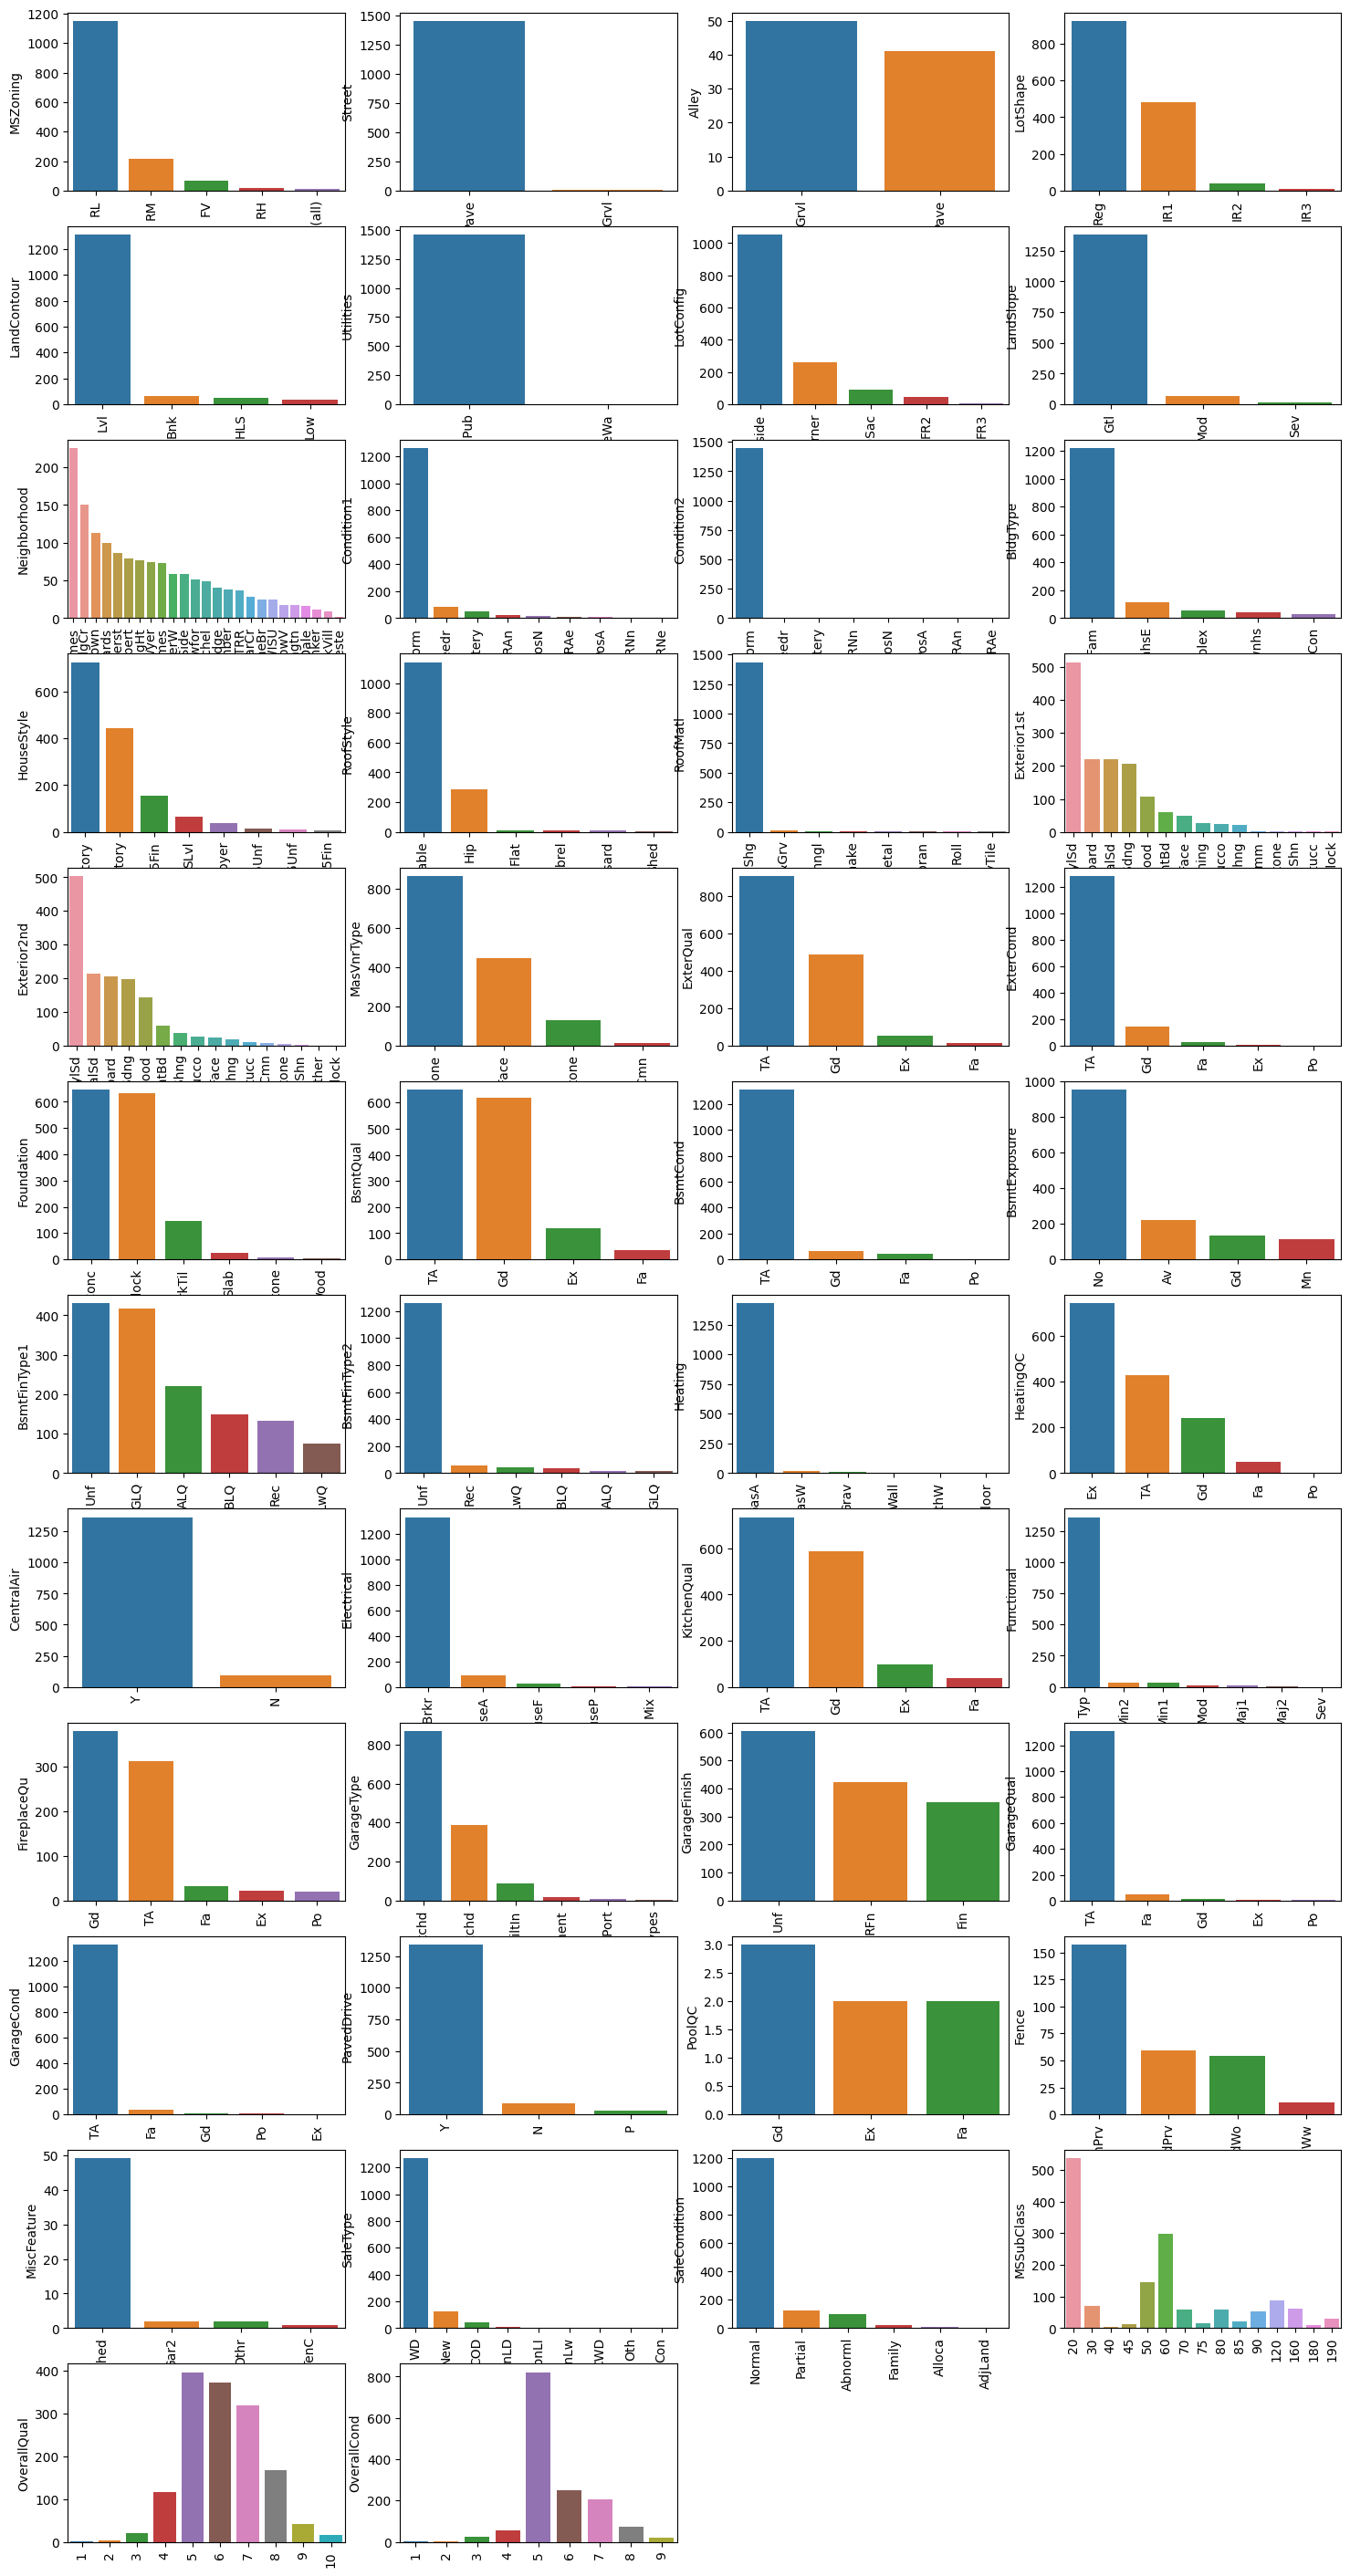

In [164]:
# Categorical Distibution of data
plt.figure(figsize=(18,36))
plt.title("Category Features - Distribution")
index = 1
for col in obj_cols_added:
  plt.subplot(12,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())
  index += 1

**Note:** Utilities has only one data point for 2nd category NoSeWa. So should be removed.

###  a) Dealing with missing values
  All of our data has to be numerical or of some category. There can't be any missing values And as we've seen using df.isna().sum() our data still has plenty of missing values.

   

1.   Rows or Columns which have all data values missing will be removed.
2.   Filling numerical values first. Fill any column with missing values with the median(Better than Mean for outliers) of that column.
3.   Filling Categorical missing data with new category or mode of category.

#### **1. Remove rows which have all data values missing.**

In [165]:
# Rows or Columns which have all data values missing will be removed.
# That means atleast having one data item in a row or a column is neccessary

df_without_all_na = df.dropna(how="all").dropna(how="all", axis=1)

# check if any Nan row in Target column
df_without_all_na["SalePrice"].isna().sum()

#df.loc[:,df.iloc[43].isnull()]

# Same for test data
df_test = df_test.dropna(how="all").dropna(how="all", axis=1)


In [166]:
df_without_all_na.shape, df.shape, df_test.shape  ## No such rows were there

((1459, 80), (1459, 80), (1459, 79))

In [167]:
df_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [168]:
# Rows which have atleast one Missing value
df_without_all_na.isna().any(axis=1).sum()  # alll have atlast one
# df_without_all_na.T.isna().sum().sum()

1459

**Droping some of Features as they have most of data missing and those with only one category.**

In [169]:
# Droping Utilities as all data for belong to one category except one.
# Dropping others with huge NaN values:
# PoolQC           1452
# Fence            1178
# MiscFeature      1404
# Alley            1367
drop_cols = ['Alley', 'Fence', 'MiscFeature', 'Utilities', 'PoolQC']
df_without_all_na.drop(columns=drop_cols, inplace=True)
print('droped columns: ', drop_cols)

# Also remove from variable
for col in drop_cols:
  obj_cols_added.remove(col)

# Droppping same columns from test daata also
df_test.drop(columns=drop_cols, inplace=True)
for col in drop_cols:
  obj_cols_added_test.remove(col)

droped columns:  ['Alley', 'Fence', 'MiscFeature', 'Utilities', 'PoolQC']


 **Method 1: Split Data**
 Before fill nan values, going to split our data into test and train sets using no. of Nan values in a row. If row has less than 5 missing values, will ue it for training my model.

In [170]:
# Split rows into train and valid on basis of missing values not more than 5 per row
train_5 = df_without_all_na.copy
test_5 = df_without_all_na.copy
train_5 = df_without_all_na[df_without_all_na.T.isna().sum() < 5]
test_5 = df_without_all_na[df_without_all_na.T.isna().sum() >= 5]
len(train_5), len(test_5), (len(train_5) * 100)/ len(df_without_all_na)

(1348, 111, 92.3920493488691)

In [171]:
train_5.shape, test_5.shape

((1348, 75), (111, 75))

In [172]:
train_5.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### **Filling numerical values**
**Method 1. Fill Numeric missing data with median values.**

In [173]:
# Make a copy of data before filling median values to numeric features
df_before_fillna = df_without_all_na.copy()

# Only getting Numeric values which are not a category, filled.
int_float_cols_sub = list(set(int_float_cols) - set(obj_cols_to_add))
def fill_missing_numeric(df, int_float_cols_sub):
  for col in int_float_cols_sub:
    df[col]= df[col].fillna(df[col].median())

fill_missing_numeric(df_without_all_na, int_float_cols_sub)
fill_missing_numeric(train_5, int_float_cols_sub)
fill_missing_numeric(test_5, int_float_cols_sub)


# Fill numeric values in test too
int_float_cols_sub_test = int_float_cols_sub.copy()
int_float_cols_sub_test.remove('SalePrice')
fill_missing_numeric(df_test, int_float_cols_sub_test)

In [174]:
df_without_all_na.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


**Method 2. Fill Numeric missing data using SimpleImputer Sklearn Tool.**

In [175]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,
                             strategy="mean")
# # Calculate fill value
# mean_imputer.fit(df_before_fillna[int_float_cols_sub])
# # Transform to fill above mean value
# df_imputed = mean_imputer.transform(df_before_fillna[int_float_cols_sub])
df_imputed = mean_imputer.fit_transform(df_before_fillna[int_float_cols_sub])
df_imputed.shape, len(int_float_cols_sub)

((1459, 34), 34)

In [176]:
df_imputed

array([[   8.,  706.,    2., ...,    0.,  548.,    0.],
       [   6.,  978.,    5., ...,    0.,  460.,    0.],
       [   6.,  486.,    9., ...,    0.,  608.,    0.],
       ...,
       [   9.,  275.,    5., ...,    0.,  252.,    0.],
       [   5.,   49.,    4., ...,    0.,  240., 1029.],
       [   6.,  830.,    6., ...,    0.,  276.,  290.]])

**Note:** Need to transform data back to Dataframe and include other features along.

**3. Filling Categorical missing data**

Convert Objects to Categories

In [177]:
# Convert to Category
def obj_to_cat(df, cols):
  for col in cols:
    df[col] = df[col].astype('category').cat.as_ordered()

obj_to_cat(df_without_all_na, obj_cols_added)
obj_to_cat(train_5, obj_cols_added)
obj_to_cat(test_5, obj_cols_added)

# Test Data
obj_to_cat(df_test, obj_cols_added)

In [178]:
df_without_all_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   category
 1   MSZoning       1459 non-null   category
 2   LotFrontage    1459 non-null   float64 
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   category
 5   LotShape       1459 non-null   category
 6   LandContour    1459 non-null   category
 7   LotConfig      1459 non-null   category
 8   LandSlope      1459 non-null   category
 9   Neighborhood   1459 non-null   category
 10  Condition1     1459 non-null   category
 11  Condition2     1459 non-null   category
 12  BldgType       1459 non-null   category
 13  HouseStyle     1459 non-null   category
 14  OverallQual    1459 non-null   category
 15  OverallCond    1459 non-null   category
 16  YearBuilt      1459 non-null   int64   
 17  YearRemodAdd   1459 non-null   in

**Note:** Now we got our data into categories.

In [179]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   category
 1   MSZoning       1455 non-null   category
 2   LotFrontage    1459 non-null   float64 
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   category
 5   LotShape       1459 non-null   category
 6   LandContour    1459 non-null   category
 7   LotConfig      1459 non-null   category
 8   LandSlope      1459 non-null   category
 9   Neighborhood   1459 non-null   category
 10  Condition1     1459 non-null   category
 11  Condition2     1459 non-null   category
 12  BldgType       1459 non-null   category
 13  HouseStyle     1459 non-null   category
 14  OverallQual    1459 non-null   category
 15  OverallCond    1459 non-null   category
 16  YearBuilt      1459 non-null   int64   
 17  YearRemodAdd   1459 non-null  

In [180]:
train_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1348 non-null   category
 1   MSZoning       1348 non-null   category
 2   LotFrontage    1348 non-null   float64 
 3   LotArea        1348 non-null   int64   
 4   Street         1348 non-null   category
 5   LotShape       1348 non-null   category
 6   LandContour    1348 non-null   category
 7   LotConfig      1348 non-null   category
 8   LandSlope      1348 non-null   category
 9   Neighborhood   1348 non-null   category
 10  Condition1     1348 non-null   category
 11  Condition2     1348 non-null   category
 12  BldgType       1348 non-null   category
 13  HouseStyle     1348 non-null   category
 14  OverallQual    1348 non-null   category
 15  OverallCond    1348 non-null   category
 16  YearBuilt      1348 non-null   int64   
 17  YearRemodAdd   1348 non-null   in

### **Filling and turning categorical variables to numbers**

**Method 1: Manual way**

In [181]:

def cat_to_numbers(df):
  for label, content  in df.items():
    # Check columns which categorical
    if pd.api.types.is_categorical_dtype(content):
      # Add binary column to inidicate whether sample had missing value
      df[label + 'is_missing'] = pd.isnull(content)
      # Add +1 because pandas encodes missing categories as -1
      df[label] = pd.Categorical(content).codes + 1

cat_to_numbers(df_without_all_na)
cat_to_numbers(train_5)
cat_to_numbers(test_5)

# Test Data
cat_to_numbers(df_test)

In [182]:
df_without_all_na.isna().sum().sum()

0

In [183]:
df_test.isna().sum().sum()

0

In [184]:
train_5.isna().sum().sum(), test_5.isna().sum().sum()

(0, 0)

In [185]:
# cat_na = []
# for col in obj_cols:
#   if col in df.columns:
#     if df[col].isna().sum() > 0:
#       cat_na.append(col)
# print('Categories with NA:', cat_na)


In [186]:
# # Update with mode for categories not have NA as Category(look into data_dict for this).
# update_with_mode = ['MasVnrType', 'Electrical']
# for col in update_with_mode:
#   df[col] = df[col].fillna(df[col].mode()[0])

In [187]:
# df['Electrical'].mode()[0]

In [188]:
# # Update with NA for Garage, Firplaces, Pool and Basement Categories as they are eligible with NA category.
# update_with_na = list(set(cat_na)-set(update_with_mode))
# for col in update_with_na:
#   df[col] = df[col].fillna('NA')

In [189]:
# update_with_mean = []
# for col in int_cols:
#   if col in df.columns:
#     if df[col].isna().sum() > 0:
#       update_with_mean.append(col)
# for col in float_cols:
#   if col in df.columns:
#     if df[col].isna().sum() > 0:
#       update_with_mean.append(col)
# print(update_with_mean)

In [190]:
# # Update numerical continuous feautures with mean.
# pop_item = update_with_mean.pop(2)
# for col in update_with_mean:
#   df[col] = df[col].fillna(df[col].mean())

In [191]:
# # Update numerical categorical feautures with 0.
# df[pop_item] = df[pop_item].fillna(int(0))

In [192]:
# df.isna().sum().sum()

In [193]:
# np.concatenate([int_cols, float_cols])
# # float_cols
# # int_cols

In [194]:
# plt.figure(figsize=(18,36))
# plt.title("Float and Integer Features - Outliers")
# index = 1
# int_cols.remove('Id')
# for col in np.concatenate([int_cols, float_cols]):
#   plt.subplot(11,4,index)
#   plt.title(col)
#   plt.xticks(rotation=90)
#   sns.boxplot(df[col])
#   index += 1

In [195]:
# df[df.BsmtQual.isna() |  df.BsmtCond.isna() | df.BsmtExposure.isna() | df.BsmtFinType1.isna() |  df.BsmtFinType2.isna()]

In [196]:
# Match Test and train data shapes
df_without_all_na.shape, df_test.shape

((1459, 116), (1459, 115))

In [198]:
# No missing columns
set(df_without_all_na)- set(df_test)

{'SalePrice'}

## Data Preprocessing
Import Onehot encoder to encode categorical features

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
# hot_en = OneHotEncoder(sparse_output=False)
# hot_cols = pd.DataFrame(hot_en.fit_transform(df[list(df.dtypes[df.dtypes=='object'].index)]))
# hot_cols


### **5.2 Prepare Model**

**Method 2: To split data**

In [201]:
df_without_all_na.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClassis_missing,MSZoningis_missing,Streetis_missing,LotShapeis_missing,LandContouris_missing,LotConfigis_missing,LandSlopeis_missing,Neighborhoodis_missing,Condition1is_missing,Condition2is_missing,BldgTypeis_missing,HouseStyleis_missing,OverallQualis_missing,OverallCondis_missing,RoofStyleis_missing,RoofMatlis_missing,Exterior1stis_missing,Exterior2ndis_missing,MasVnrTypeis_missing,ExterQualis_missing,ExterCondis_missing,Foundationis_missing,BsmtQualis_missing,BsmtCondis_missing,BsmtExposureis_missing,BsmtFinType1is_missing,BsmtFinType2is_missing,Heatingis_missing,HeatingQCis_missing,CentralAiris_missing,Electricalis_missing,KitchenQualis_missing,Functionalis_missing,FireplaceQuis_missing,GarageTypeis_missing,GarageFinishis_missing,GarageQualis_missing,GarageCondis_missing,PavedDriveis_missing,SaleTypeis_missing,SaleConditionis_missing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6,4,65.0,8450,2,4,4,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,2,2008,9,5,208500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,1,4,80.0,9600,2,4,4,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,5,2007,9,5,181500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,4,68.0,11250,2,1,4,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,9,2008,9,5,223500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,7,4,60.0,9550,2,1,4,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,2,2006,9,1,140000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,6,4,84.0,14260,2,1,4,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,12,2008,9,5,250000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_without_all_na.drop('SalePrice', axis=1),
                                                    df_without_all_na['SalePrice'],
                                                    train_size=0.8,
                                                    random_state=31)

X_train_5, y_train_5 = train_5.drop('SalePrice', axis=1), train_5['SalePrice']
X_test_5, y_test_5 = test_5.drop('SalePrice', axis=1), test_5['SalePrice']

In [203]:
#Compare shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_5.shape, y_train_5.shape, X_test_5.shape, y_test_5.shape)

(1167, 115) (1167,) (292, 115) (292,)
(1348, 115) (1348,) (111, 115) (111,)


### **Building an evaluation function**
According to Kaggle for the House Price Prediction compitition, Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. Which is RMSLE(root mean squared log error).

In [204]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test, y_pred):
  return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [205]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Model1 - 1
model_ran1 = RandomForestRegressor(max_samples=800)
model_ran1.fit(X_train,y_train)
y_pred = model_ran1.predict(X_test)
print('Modeel-1', rmsle(y_test, y_pred))

# Model - 2
model_ran1 = RandomForestRegressor(max_samples=800)
model_ran1.fit(X_train_5,y_train_5)
y_pred_5 = model_ran1.predict(X_test_5)
print('Modeel-2', rmsle(y_test_5, y_pred_5))


Modeel-1 0.1698655407019967
Modeel-2 0.3225420496777375
CPU times: user 3.93 s, sys: 14.9 ms, total: 3.95 s
Wall time: 4.03 s


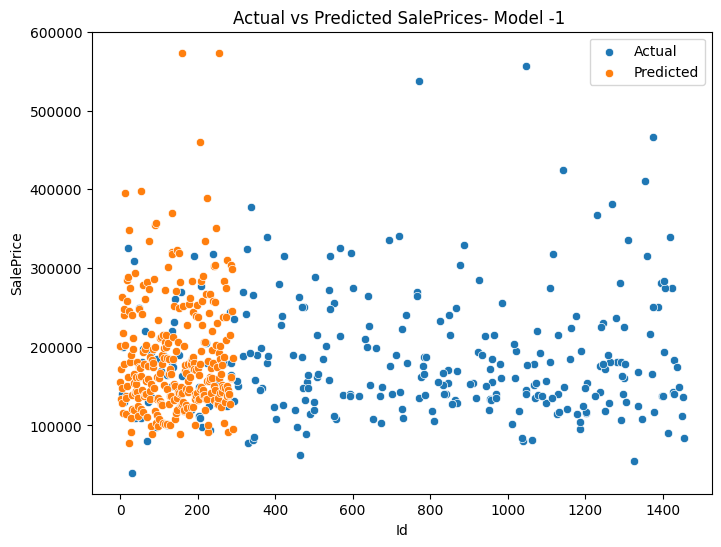

In [206]:
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted SalePrices- Model -1 ')
sns.scatterplot(y_test, label='Actual')
sns.scatterplot(y_pred, label='Predicted')
plt.legend()

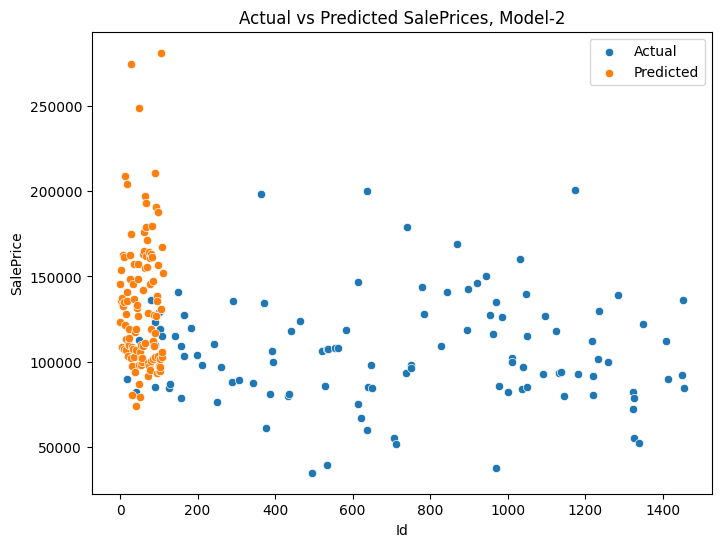

In [207]:
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted SalePrices, Model-2')
sns.scatterplot(y_test_5, label='Actual')
sns.scatterplot(y_pred_5, label='Predicted')
plt.legend()

In [208]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

model_gra = GradientBoostingRegressor()

model_gra.fit(X_train,y_train)
y_pred = model_gra.predict(X_test)
print(rmsle(y_test, y_pred))

0.1651149136996172
CPU times: user 922 ms, sys: 4.82 ms, total: 927 ms
Wall time: 952 ms


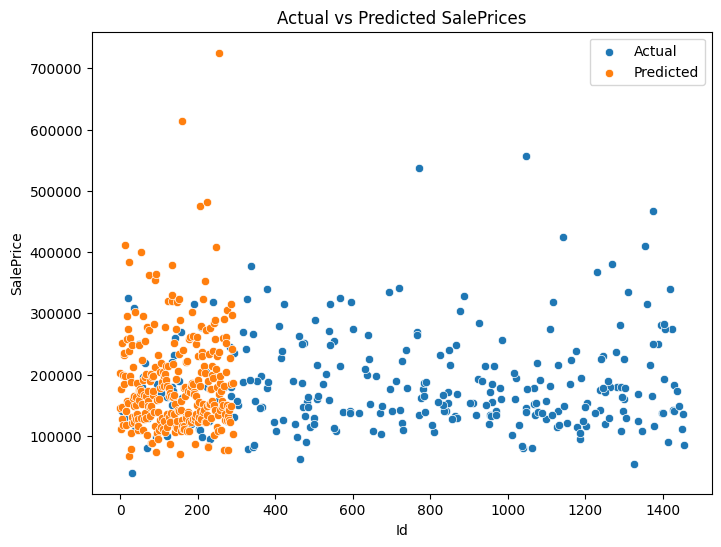

In [209]:
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted SalePrices')
sns.scatterplot(y_test, label='Actual')
sns.scatterplot(y_pred, label='Predicted')
plt.legend()

In [210]:
%%time

from sklearn.linear_model import SGDRegressor

model_sgd = SGDRegressor()

model_sgd.fit(X_train,y_train)
y_pred = model_sgd.predict(X_test)
print(rmsle(y_test, y_pred))

ValueError: ignored

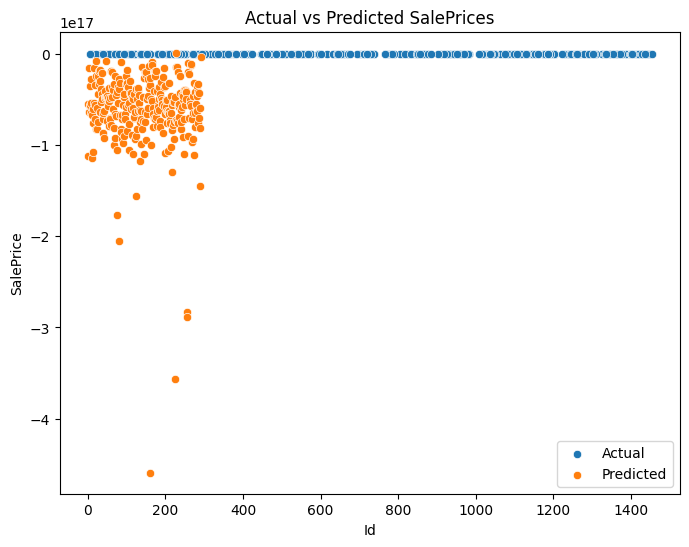

In [211]:
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted SalePrices')
sns.scatterplot(y_test, label='Actual')
sns.scatterplot(y_pred, label='Predicted')
plt.legend()

In [212]:
%%time

from xgboost import XGBRegressor

model_xgb = XGBRegressor()

model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print(rmsle(y_test, y_pred))

0.18130081558457808
CPU times: user 1.55 s, sys: 9.82 ms, total: 1.56 s
Wall time: 820 ms


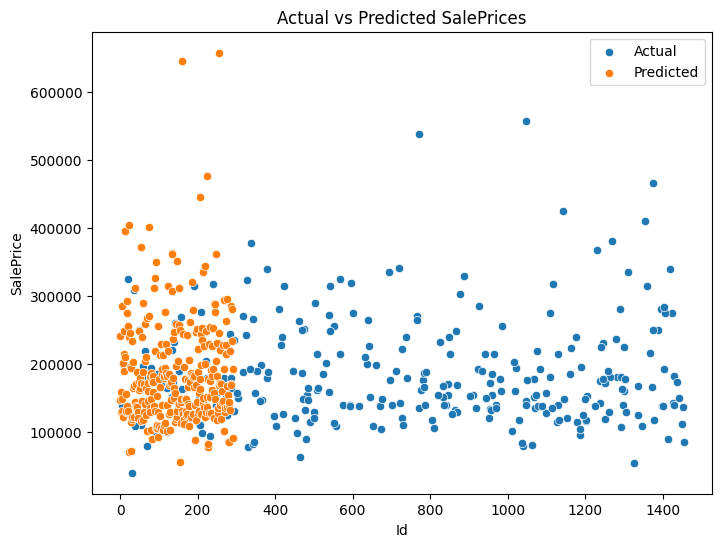

In [213]:
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted SalePrices')
sns.scatterplot(y_test, label='Actual')
sns.scatterplot(y_pred, label='Predicted')
plt.legend()

**Hyperparameter tuning with RandomizedSearchCV**

In [214]:
%%time

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRgressor Hyperparameters
hp_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth": [None,3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "auto", "sqrt"],
           "max_samples": [1.]}

# Restricting my work on Random Forest
model_rf1 = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=hp_grid,
                              n_iter= 100,
                              cv=5,
                              verbose=True)
model_rf2 = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=hp_grid,
                              n_iter= 100,
                              cv=5,
                              verbose=True)
print(model_rf1.fit(X_train, y_train))
print(model_rf2.fit(X_train_5, y_train_5))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [1.0],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                     

In [215]:
model_rf1.best_params_, model_rf2.best_params_, model_rf1.best_score_

({'n_estimators': 80,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_samples': 1.0,
  'max_features': 0.5,
  'max_depth': 10},
 {'n_estimators': 30,
  'min_samples_split': 8,
  'min_samples_leaf': 1,
  'max_samples': 1.0,
  'max_features': 0.5,
  'max_depth': None},
 0.8827117372574202)

In [217]:
#model1
y_pred1 = model_rf1.predict(X_test)
print(rmsle(y_test, y_pred1))

# model2
y_pred2_5 = model_rf2.predict(X_test_5)
print(rmsle(y_test_5, y_pred2_5))

0.16623292471355178
0.357692714150014


**Train a model with the best parameters**

In [218]:
best_fit_model = RandomForestRegressor(n_estimators= 80,
                                    min_samples_split= 4,
                                    min_samples_leaf= 1,
                                    max_samples= 1.0,
                                    max_features= 0.5,
                                    max_depth= 10)
best_fit_model.fit(X_train, y_train)
y_pred_best = best_fit_model.predict(X_test)
print(rmsle(y_test, y_pred_best))

0.16365859735504434


In [219]:
y_pred_best.shape

(292,)

In [222]:
df_test_pred = best_fit_model.predict(df_test)
df_test_pred.shape

(1459,)

In [227]:
sub = pd.DataFrame()
sub['Id'] = df_test.index
sub['SalePrice'] = df_test_pred
sub.head()

,Id,SalePrice
0,1461,126094.500921
1,1462,149097.166229
2,1463,178819.784316
3,1464,180914.445680
4,1465,193781.099743


In [229]:
sub.to_csv('sample_data/submission.csv', index=None)